In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os, glob , shutil
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2



Mounted at /content/drive


기본 설정
========

In [2]:
# 경로지정
dataPath = 'drive/MyDrive/data/slices/'

imagePathInput = os.path.join(dataPath, 'original/img/')
imageSliceOutput = os.path.join(dataPath, 'extract/img/')
testSliceOutput = os.path.join(dataPath, 'test/img/')

maskPathInput = os.path.join(dataPath, 'original/mask/')
maskSliceOutput = os.path.join(dataPath, 'extract/mask/')

train_path = 'drive/MyDrive/data/slices/newtrain/'
train_image_path = os.path.join(train_path, 'img/img/')
train_mask_path = os.path.join(train_path, 'mask/img/')




이미지 특징,원본 확인
======================

In [3]:
#이미지와 마스크의 타입 확인

imgPath = os.path.join(imagePathInput, 'CT00.nii')
img = nib.load(imgPath).get_fdata()
print(np.min(img), np.max(img), img.shape, type(img))
#최소값, 최대값 ,(x,y,z) ,타입

maskPath = os.path.join(maskPathInput, 'tooth0-slice090_z.png')
mask = cv2.imread(maskPath)
#cv2_imshow(mask)
print(np.min(mask), np.max(mask), mask.shape, type(mask))


-5696.0 5354.0 (400, 400, 280) <class 'numpy.memmap'>
0 255 (400, 400, 3) <class 'numpy.ndarray'>


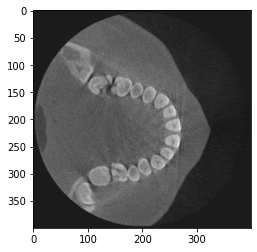

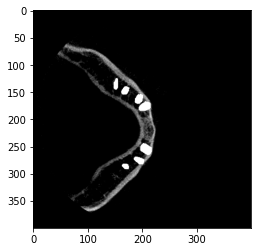

In [4]:
# 원본 이미지 확인해보기
imgSlice = img[:,:,160]
plt.imshow(imgSlice, cmap='gray')
plt.show()

#원본 마스크 확인해보기
imgSlice = mask[:,:,0]
plt.imshow(imgSlice,cmap='gray')
plt.show()

함수들
=======================

In [5]:

def normalizeImageIntensityRange(img):
    return (img - np.min(img)) / (np.max(img) - np.min(img))

#nii에서 슬라이스를 불러와 nomalize 실행
def readImageVolume(imgPath, normalize=False):
    img = nib.load(imgPath).get_fdata()
    if normalize:
        return normalizeImageIntensityRange(img)
    else:
        return img

#단일 이미지 저장함수
def saveSlice(img, fname, path):
    img = np.uint8(img*255)
    fout = os.path.join(path, f'{fname}')
    cv2.imwrite(fout, img)
    print(f'Slice save: {fout}')

# 방향별로 슬라이스 저장함수
def sliceAndSaveVolumeImage(vol, fname, path):
    (dimx, dimy, dimz) = vol.shape

    for i in range(dimz):
        saveSlice(vol[:,:,i], fname+f'-slice{str(i).zfill(3)}_z.png', path)

def normalizemask(img):
    img[img < 255] = 0
    return (img/255)

이미지 추출
============================

In [6]:
#모든 nii 파일에 대하여 슬라이스 저장
for index, filename in enumerate(sorted(glob.iglob(imagePathInput+'*.nii'))):
  if (index==3):
    img = readImageVolume(filename, True)
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    numOfSlices = sliceAndSaveVolumeImage(img, 'tooth'+str(index), imageSliceOutput)
    print(f'\n{filename}, {numOfSlices} slices created \n')

drive/MyDrive/data/slices/original/img/CT03.nii (400, 400, 280) 1080 0.0 1.0
400 400 280
Slicing Z: 
[+] Slice saved: drive/MyDrive/data/slices/extract/img/tooth3-slice279_z.png
drive/MyDrive/data/slices/original/img/CT03.nii, 280 slices created 



In [ ]:
#마스크 파일 흰 부분만 저장하기
cnt = 0
for index, filename in enumerate(sorted(glob.iglob(maskPathInput+'tooth0*.png'))):
    m = cv2.imread(filename)
    mask = normalizemask(m)
    saveSlice(mask[:,:,0], os.path.basename(filename), maskSliceOutput)
    cnt+=1
print(str(cnt)+'개의 이미지를 분리해냈습니다.')
print("추출된 경로:"+maskSliceOutput)

In [8]:
#eval에 집어넣기
for index, filename in enumerate(sorted(glob.iglob(f'/content/drive/MyDrive/data/slices/extract/mask/tooth3*'))):
    head,tail = os.path.split(filename)
    shutil.copy(filename,'/content/drive/MyDrive/data/slices/neweval/mask/'+tail)
    print(f'{filename}->')

/content/drive/MyDrive/data/slices/extract/mask/tooth3-slice000_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth3-slice001_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth3-slice002_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth3-slice003_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth3-slice004_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth3-slice005_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth3-slice006_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth3-slice007_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth3-slice008_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth3-slice009_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth3-slice010_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth3-slice011_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth3-slice012_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth3-slice013_

In [ ]:
for index, filename in enumerate(sorted(glob.iglob(f'/content/drive/MyDrive/data/slices/extract/mask/tooth0*'))):
    head,tail = os.path.split(filename)
    shutil.copy(filename,'/content/drive/MyDrive/data/slices/newtrain/mask/img/'+tail)
    print(f'{filename}->')

/content/drive/MyDrive/data/slices/extract/mask/tooth0-slice000_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth0-slice001_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth0-slice002_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth0-slice003_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth0-slice004_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth0-slice005_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth0-slice006_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth0-slice007_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth0-slice008_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth0-slice009_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth0-slice010_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth0-slice011_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth0-slice012_z.png->
/content/drive/MyDrive/data/slices/extract/mask/tooth0-slice013_

추출된 이미지 분류해서 저장
==============================

In [ ]:
file_range = [[0,279],[0,279],[0,279],[0,279],[0,279],[0,279]]#[[70,249],[86,258]]

In [ ]:
#이미지 파일들 자동 분류

if os.path.exists(train_image_path) == False:
  os.makedirs(train_image_path)
  
for i in range(len(file_range)):
  for index, filename in enumerate(sorted(glob.iglob(f'{imageSliceOutput}tooth{i}*'))):
    s = len(filename)-9
    e = s+3
    head,tail = os.path.split(filename)
    idx = int(filename[s:e])
    if (file_range[i][0] <= idx and idx <= file_range[i][1]) :
      shutil.copy(filename,train_image_path+tail)
      print(f'{filename}->{train_image_path+tail} to_test({idx})')

In [ ]:
#마스크 파일들 자동 분류

if os.path.exists(train_mask_path) == False:
  os.makedirs(train_mask_path)


for i in range(len(file_range)):
  if i==3:
    for index, filename in enumerate(sorted(glob.iglob(f'{maskSliceOutput}tooth{i}*'))):
      s = len(filename)-9
      e = s+3
      head,tail = os.path.split(filename)
      idx = int(filename[s:e])
      if (file_range[i][0] <= idx and idx <= file_range[i][1]) :
        shutil.copy(filename,train_mask_path+tail)
        print(f'{filename}->{train_mask_path+tail} to_train({idx})')

In [ ]:
#이미지 파일 한 곳에 모으기
allmask = '/content/drive/MyDrive/data/slices/allimg/'

for i in range(len(file_range)):
  for index, filename in enumerate(sorted(glob.iglob(f'{imageSliceOutput}tooth{i}*'))):
    s = len(filename)-9
    e = s+3
    head,tail = os.path.split(filename)
    idx = int(filename[s:e])
    if (file_range[i][0] <= idx and idx <= file_range[i][1]) :
      shutil.copy(filename,allmask+tail)
      print(f'{filename}->{allmask+tail} to_allimg({idx})')

In [ ]:
#마스크 파일 한 곳에 모으기
allmask = '/content/drive/MyDrive/data/slices/allmask/'

for i in range(len(file_range)):
  for index, filename in enumerate(sorted(glob.iglob(f'{maskSliceOutput}tooth{i}*'))):
    s = len(filename)-9
    e = s+3
    head,tail = os.path.split(filename)
    idx = int(filename[s:e])
    if (file_range[i][0] <= idx and idx <= file_range[i][1]) :
      shutil.copy(filename,allmask+tail)
      print(f'{filename}->{allmask+tail} to_allmask({idx})')